## Predicting Customer Churn

### What is customer churn?
Customer churn is when customers stop doing business with a company. If a customer stopped using a service, they churned.

### Churn in the telco industry
Churn in the telco industry can occur due to factors such a pricing (monthly / annual fees), service quality, customer support, other competitive offerings, etc.

### Importance of churn as a KPI
- **Customer Retention Insight**: Churn directly reflects how well a company retains its customers. High churn signals dissatisfaction, poor service, or strong competition.
- **Revenue Impact**: Losing customers means losing recurring revenue, and even a small increase in churn can lead to significant financial losses over time.
- **Cost Efficiency**: Acquiring new customers is usually more expensive than retaining existing ones. Monitoring churn helps prioritize retention strategies that are more cost-effective compared to strategies to bring in new customers.
- **Service & Product Feedback**: Churn trends can reveal which products, services, or customer segments are underperforming, guiding improvements and innovation.

### Why predict churn
Churn prediction is important for telco companies because retaining existing customers tend to be more cost-effective than acquiring new ones. By leveraging data science techniques, companies can identify at-risk customers and implement targeted retention strategies to reduce churn and improve long-term profitability.

In this project, we will explore the data and try to answer the following questions:
- What is the % of churn in the sample telco company?
- Are there specific demographics that tend to have higher/lower churn?
- Are there specific services that tend to have higher/lower churn?

### Download data and import relevant libraries

Download Telco Customer Churn data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Import necessary libraries for project

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

## other settings
pd.options.display.max_columns = None # to avoid truncated outputs

### Data Exploration & Preprocessing

In [2]:
## read dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset contains information about:
- Customer demographics e.g. gender, senior citizen status
- Customers who left within the last month i.e. churn
- Services that a customer signed up for e.g. phone serivce, multiple lines, internet service, online security, online backup, device protection, etc.
- Customer account information e.g. contract, paperless bililng, payment method, monthly / total charges

In [3]:
df.shape

(7043, 21)

In [4]:
print(df.describe())
# SeniorCitizen has a mean of 0.16, suggesting there's a larger proportion of customers who are not senior citizens

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
## check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset has no missing values.

Notice that TotalCharges is of `object` type instead of `float64` like MonthlyCharges. We can take a closer look as to why.

In [7]:
mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isna()
df[mask]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We see that TotalCharges for these 11 customers are missing / empty.

In [8]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


These customers with tenure = 0 (with monthly charge but no total charge) are likely new sign-ups who haven't had sufficient interaction with the service to contribute meaningful behavioral patterns or trends for the purpose of our churn analysis. Since they represent a very small and isolated segment (11 customers), we will exclude them from the dataset for the rest of the analysis to ensure cleaner and more interpretable results.

In [9]:
df_cleaned = df[df['tenure']!=0].copy()
# check that rows have been removed
df_cleaned[df_cleaned['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


We will also drop the `customerID` column as it is a unique identifier and does not provide meaningful insights to our analysis and prediction.

In [10]:
df_cleaned = df_cleaned.drop(columns=['customerID'])
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# convert total charges to numeric
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

### EDA Visualization

In [12]:
df_cleaned.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

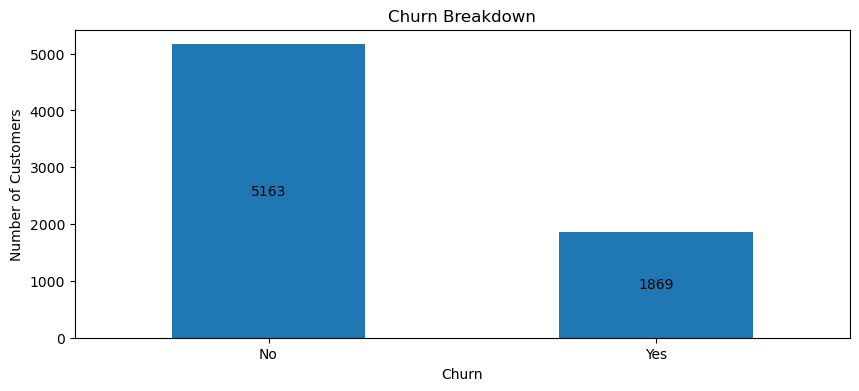

In [13]:
## split of target variable (churn vs non-churn)
fig, ax = plt.subplots(figsize=(10, 4))
df_cleaned['Churn'].value_counts().plot(kind='bar', ax=ax)

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='center')

ax.set_title('Churn Breakdown')
ax.set_xticklabels(df_cleaned['Churn'].value_counts().index, rotation=0)
ax.set_ylabel('Number of Customers')
plt.show()

There is an uneven split between number of customers who churned and who did not. We may consider using sampling techniques to balance the dataset.

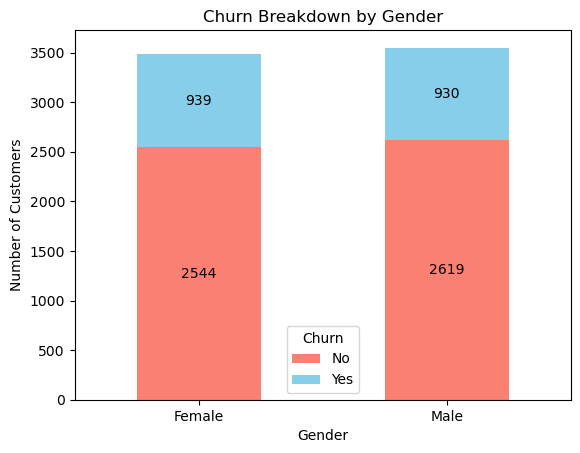

In [14]:
## split of records by gender
fig, ax = plt.subplots()
counts = df_cleaned.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True, ax=ax, color=['salmon', 'skyblue'])

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='center')

ax.set_title('Churn Breakdown by Gender')
ax.set_xlabel('Gender')
ax.set_xticklabels(counts.index, rotation=0)
ax.set_ylabel('Number of Customers')
plt.show()

From the bar chart above, both genders behave in a similar manner when it comes to churning, suggesting gender may have limited impact on churn behavior / likely not a strong predictor of churn.

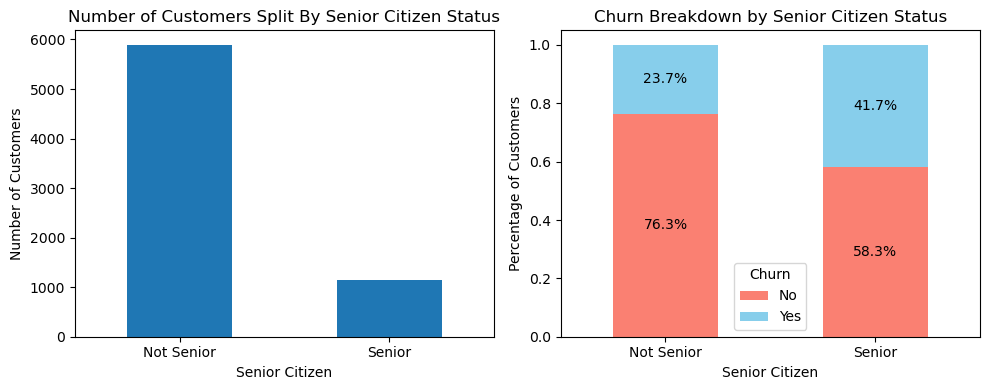

In [15]:
## split of records by senior citizen status
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df_cleaned['SeniorCitizen'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Customers Split By Senior Citizen Status')
ax[0].set_xlabel('Senior Citizen')
ax[0].set_xticklabels(labels=['Not Senior', 'Senior'], rotation=0)
ax[0].set_ylabel('Number of Customers')

counts = df_cleaned.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
normalized_counts = counts.div(counts.sum(axis=1), axis=0)
normalized_counts.plot(kind='bar', stacked=True, ax=ax[1], color=['salmon', 'skyblue'])

# add labels
for bar in ax[1].containers:
    labels = [f'{v.get_height() * 100:.1f}%' if v.get_height() > 0 else '' for v in bar]
    ax[1].bar_label(bar, labels, label_type='center')

ax[1].set_title('Churn Breakdown by Senior Citizen Status')
ax[1].set_xlabel('Senior Citizen')
ax[1].set_xticklabels(labels=['Not Senior', 'Senior'], rotation=0)
ax[1].set_ylabel('Percentage of Customers')

plt.tight_layout()
plt.show()

From the plots above, non-senior citizens make up the bulk of the customer base and show a lower churn rate (23.7%). Senior citizens, while fewer in number, have a significantly higher churn rate (41.7%). This might suggest senior citizens are more likely to churn, which could be a signal dive deeper into why.

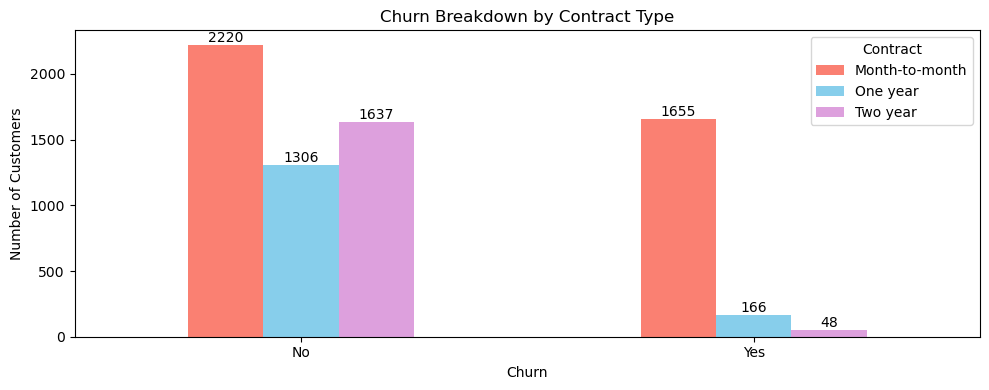

In [16]:
## split of records by contract type
fig, ax = plt.subplots(figsize=(10, 4))
counts = df_cleaned.groupby(['Churn', 'Contract']).size().unstack(fill_value=0)
counts.plot(kind='bar', ax=ax, color=['salmon', 'skyblue', 'plum'])

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge')

ax.set_title('Churn Breakdown by Contract Type')
ax.set_xlabel('Churn')
ax.set_xticklabels(counts.index, rotation=0)
ax.set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

From the plot above, we observe that ~ 88.6% of customers who churned are on month-to-month contract, as compared to 8.9% on one-year contracts and 2.6% on two-year contracts.

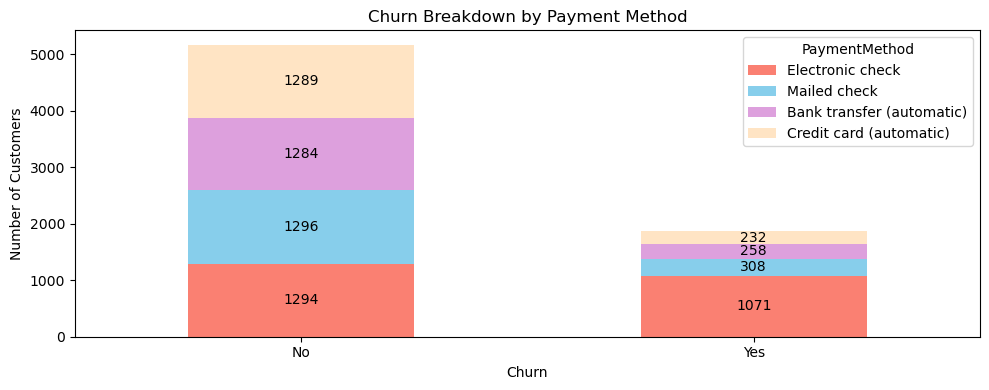

In [17]:
## split of records by payment method
fig, ax = plt.subplots(figsize=(10, 4))
counts = df_cleaned.groupby(['Churn', 'PaymentMethod']).size().unstack(fill_value=0)
counts = counts[['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']] # reorder columns
counts.plot(kind='bar', stacked=True, ax=ax, color=['salmon', 'skyblue', 'plum', 'bisque'])

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='center')

ax.set_title('Churn Breakdown by Payment Method')
ax.set_xlabel('Churn')
ax.set_xticklabels(counts.index, rotation=0)
ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Here, we observe that majority of the customers who churned (1,071 out of 1,869) opted for electronic check as their payment method.

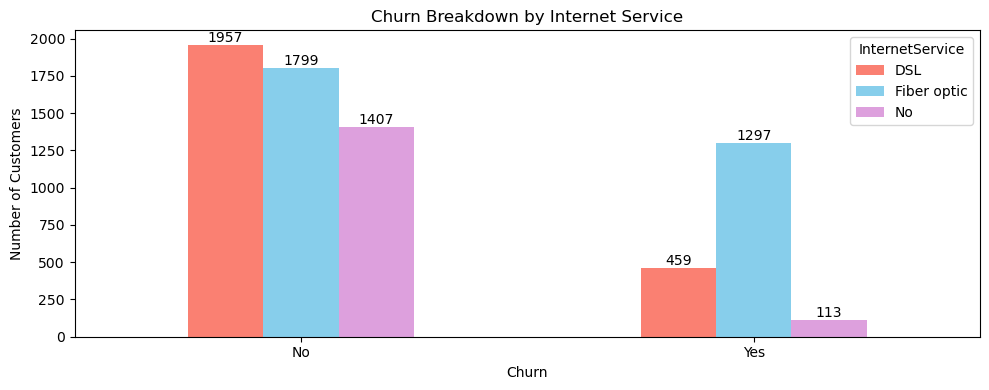

In [18]:
## split of records by internet service
fig, ax = plt.subplots(figsize=(10, 4))
counts = df_cleaned.groupby(['Churn', 'InternetService']).size().unstack(fill_value=0)
counts.plot(kind='bar', ax=ax, color=['salmon', 'skyblue', 'plum'])

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge')

ax.set_title('Churn Breakdown by Internet Service')
ax.set_xlabel('Churn')
ax.set_xticklabels(counts.index, rotation=0)
ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

In terms of Internet Service, we see that majority of customers who churned were using Fiber optic.

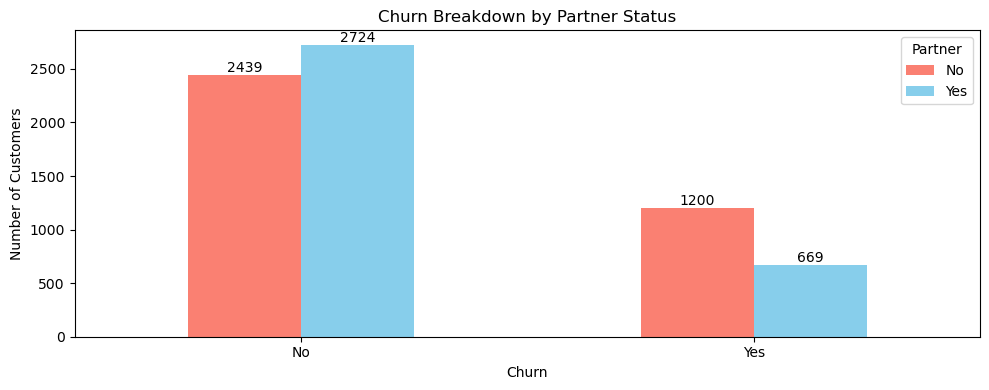

In [19]:
## split of records by partner status
fig, ax = plt.subplots(figsize=(10, 4))
counts = df_cleaned.groupby(['Churn', 'Partner']).size().unstack(fill_value=0)
counts.plot(kind='bar', ax=ax, color=['salmon', 'skyblue'])

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge')

ax.set_title('Churn Breakdown by Partner Status')
ax.set_xlabel('Churn')
ax.set_xticklabels(counts.index, rotation=0)
ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Here, we observe that majority of customers who churned (~ 64.2%) do not have partners.

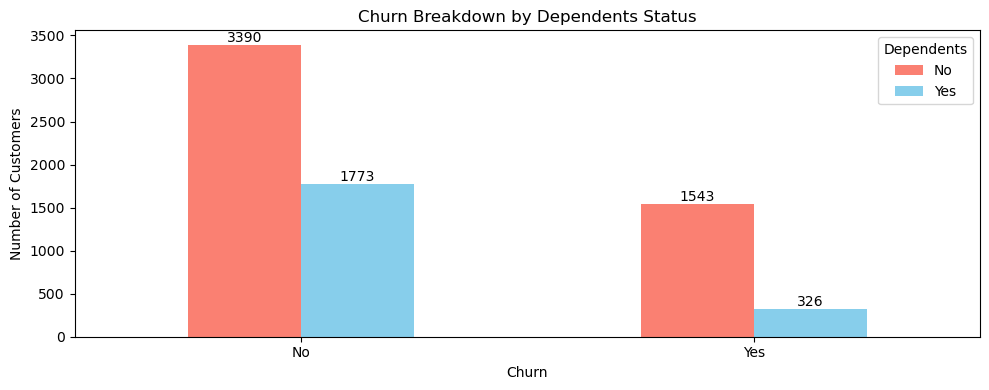

In [20]:
## split of records by dependents status
fig, ax = plt.subplots(figsize=(10, 4))
counts = df_cleaned.groupby(['Churn', 'Dependents']).size().unstack(fill_value=0)
counts.plot(kind='bar', ax=ax, color=['salmon', 'skyblue'])

# add labels
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge')

ax.set_title('Churn Breakdown by Dependents Status')
ax.set_xlabel('Churn')
ax.set_xticklabels(counts.index, rotation=0)
ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

There is a higher proportion of customers with dependents who did not churn, compared to customers without dependents who did churn. This may suggest that customers with families are more likely to stay with the same telco provider, possibly due to shared plans or the convenience of keeping everyone on a single service.

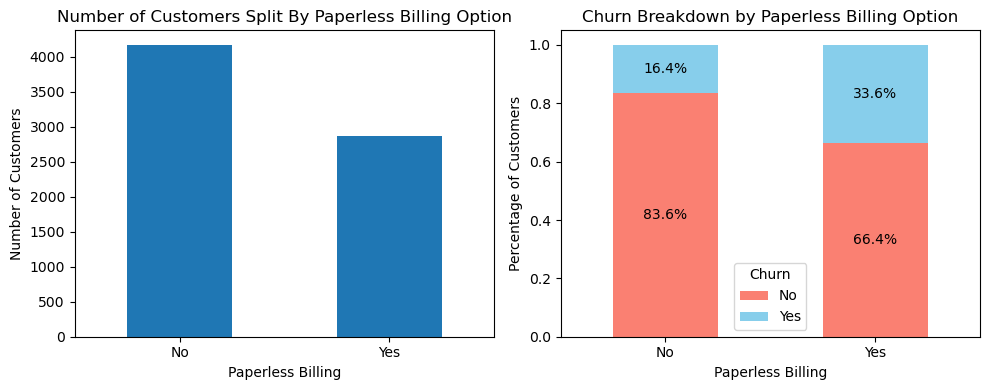

In [21]:
## split of records by paperless billing
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df_cleaned['PaperlessBilling'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Customers Split By Paperless Billing Option')
ax[0].set_xlabel('Paperless Billing')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)
ax[0].set_ylabel('Number of Customers')

counts = df_cleaned.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
normalized_counts = counts.div(counts.sum(axis=1), axis=0)
normalized_counts.plot(kind='bar', stacked=True, ax=ax[1], color=['salmon', 'skyblue'])

# add labels
for bar in ax[1].containers:
    labels = [f'{v.get_height() * 100:.1f}%' if v.get_height() > 0 else '' for v in bar]
    ax[1].bar_label(bar, labels, label_type='center')

ax[1].set_title('Churn Breakdown by Paperless Billing Option')
ax[1].set_xlabel('Paperless Billing')
ax[1].set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax[1].set_ylabel('Percentage of Customers')

plt.tight_layout()
plt.show()

From the plot above, we observe that although fewer customers opted for paperless billing, 33.6% of them churned, compared to only 16.4% of customers who chose paper billing.

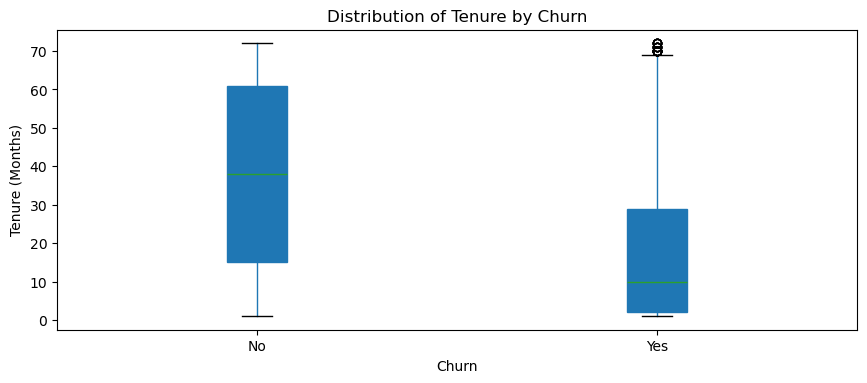

In [22]:
## box plot of records for tenure grouped by churn
fig, ax = plt.subplots(figsize=(10, 4))
df_cleaned.boxplot(column=['tenure'], by='Churn', patch_artist=True, grid=False, ax=ax)
ax.set_ylabel('Tenure (Months)')
plt.title('Distribution of Tenure by Churn')
plt.suptitle('')
plt.show()

From the box plot above, we observe that majority of customers who churned tended to be relatively "younger" customers in terms of tenure / time spent with the company, compared to the long-term and potentially more loyal customers.

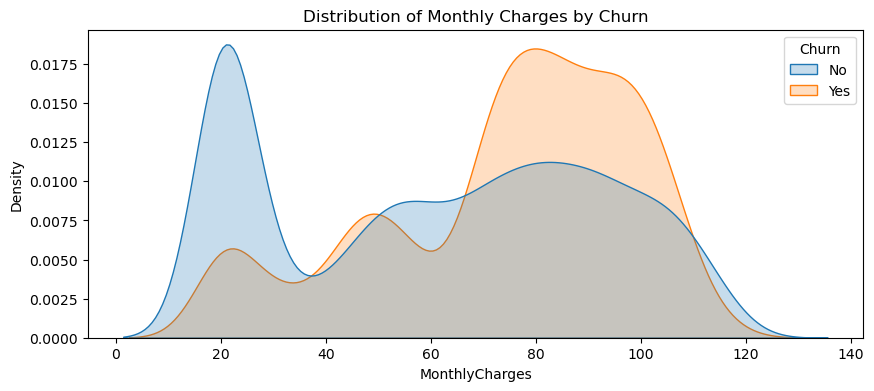

In [23]:
## density plot of records for monthly charges grouped by churn
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(data=df_cleaned, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False)
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

From the above density plot, we can see that there is a higher number of customers who churned have higher monthly charges.

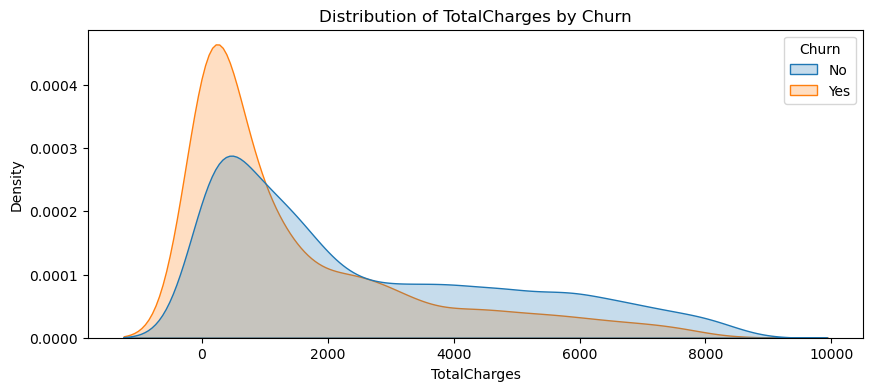

In [24]:
## density plot of records for total charges
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(data=df_cleaned, x="TotalCharges", hue='Churn', fill=True, common_norm=False)
plt.title("Distribution of TotalCharges by Churn")
plt.show()

From the plot above, we can see that customers who churned had a greater skew towards lower total charges, coupled with higher monthly charges, matches what we've seen in the tenure box plot, since lower total charges could mean less time spent with the company as well.

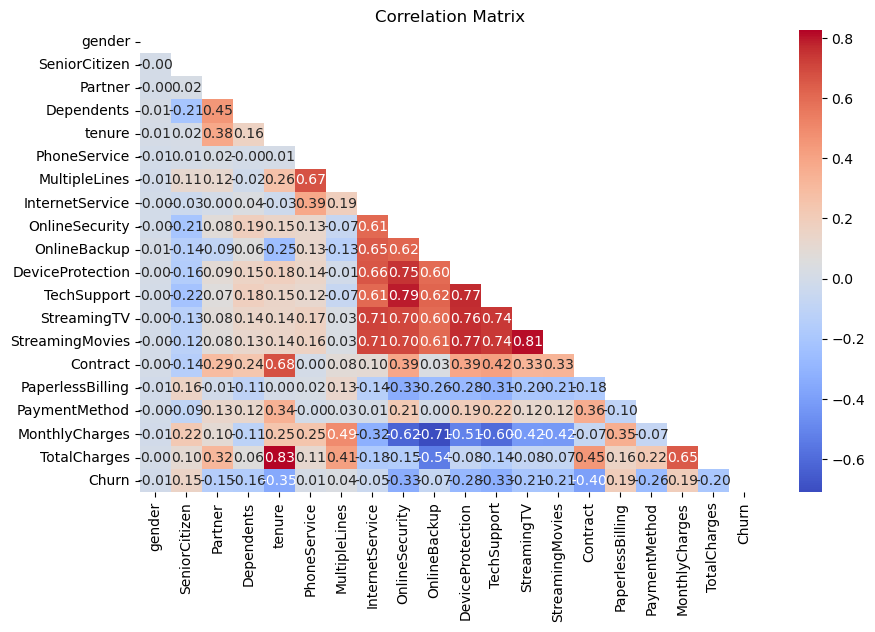

In [25]:
## correlation matrix
df_encoded = df_cleaned.copy()
binary_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_encoded[binary_features] = df_encoded[binary_features].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

categorical_features = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
for col in categorical_features:
    df_encoded[col], _ = pd.factorize(df_encoded[col])

corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", ax=ax)
plt.title("Correlation Matrix")
plt.show()

### Data Modelling & Evaluation

We observed in the EDA that the numerical features (tenure, MonthlyCharges, TotalCharges) are distributed over a wide range of values, hence we will use a StandardScaler to scale them down to the same range.

We will also use one-hot encoding to encode categorical features to avoid implying any order.

In [26]:
df_encoded = df_cleaned.copy()
binary_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_encoded[binary_features] = df_encoded[binary_features].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

## preprocess training data
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features),
        ('numerical', StandardScaler(), numerical_features)
    ],
    remainder='passthrough')

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

## splitting data to training vs test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We will start with a basic logistic regression for predicting customer churn.

In [27]:
from sklearn.linear_model import LogisticRegression

## build the pipeline for prediction
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(random_state=42, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('numerical', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

To evaluate the model, we can look at precision, recall and f1-score.

- Focusing on precision alone may miss too many actual churners.
- Recall alone might waste resources on false alarms (false positives)
- F1 finds a balance

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## evaluate test data
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1] # get probability of class 'Churn'

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Accuracy: 0.726
Precision: 0.490
Recall: 0.794
F1 Score: 0.606
ROC AUC: 0.835


In [29]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

pipeline_rf.fit(X_train, y_train)

y_pred = pipeline_rf.predict(X_test)
y_proba = pipeline_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Accuracy: 0.781
Precision: 0.615
Recall: 0.473
F1 Score: 0.535
ROC AUC: 0.814


In [30]:
import xgboost as xgb

neg, pos = np.bincount(y_train)

pipeline_xgb = Pipeline([
    ('prep', preprocessor),
    ('model', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        scale_pos_weight=neg/pos
    ))
])

pipeline_xgb.fit(X_train, y_train)

y_pred = pipeline_xgb.predict(X_test)
y_proba = pipeline_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1033
           1       0.51      0.67      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407

Accuracy: 0.743
Precision: 0.513
Recall: 0.674
F1 Score: 0.583
ROC AUC: 0.810


We can also explore a stacking classifier, with logistic regression, random forest and xgb as base models.

StackingClassifier learns which combinations of base model predictions are most predictive of the true outcome. The meta model learns to recognize patterns in the base models’ predictions and uses those patterns to make smarter final decisions.

In [31]:
from sklearn.ensemble import StackingClassifier

stacked = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, class_weight='balanced')),
        ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
        ('xgb', xgb.XGBClassifier(eval_metric='auc', random_state=42, scale_pos_weight=neg/pos))
    ],
    final_estimator=LogisticRegression(random_state=42)
)

pipeline_stacked = Pipeline([
    ('prep', preprocessor),
    ('model', stacked)
])

pipeline_stacked.fit(X_train, y_train)

y_pred = pipeline_stacked.predict(X_test)
y_proba = pipeline_stacked.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.58      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy: 0.796
Precision: 0.625
Recall: 0.583
F1 Score: 0.603
ROC AUC: 0.836


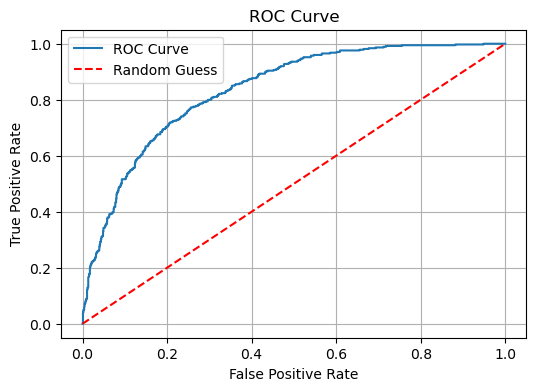

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Among the four classifiers, the stacking classifier had best ROC AUC score of 0.836.

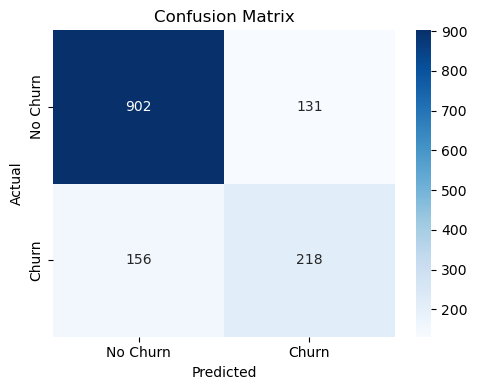

In [32]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()

From the confusion matrix, as expected because of the imbalanced dataset, the model was able to predict a large majority of the actual non churners (902) but missed 156 of churners (False Negative - predicted non-churn).

Depending on the business, the ROC curve can also be used to set the business strategy. If the business can afford to contact 1,000 customers without compromising on profitability, the ROC curve can be used to find the top 1,000 most likely churners for more efficient targeting.